In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
import pymysql

In [3]:
conn = pymysql.connect(host='172.20.135.53', user='ws',
                        password='1234',
                        db='SQL_P3', charset='utf8')
cur = conn.cursor(pymysql.cursors.DictCursor)

In [4]:
cur = conn.cursor(pymysql.cursors.DictCursor)
cur.execute('''
            select *
            from economy_idc_rate_r as e
                inner join child_support as c
                on e.years = c.years
                        
            ''')
rows = cur.fetchall() # 모든 데이터를 가져옴-> DataFrame 형태
ecDF = pd.DataFrame(rows)

In [5]:
ecDF = ecDF.drop(columns= 'c.years')
ecDF.index = ecDF.loc[:,'years']

In [6]:
ecDF = ecDF.drop(columns='years')

In [7]:
ecDF['child_support_per1']

years
2003    29.4
2006    35.6
2009    41.0
2012    50.2
2015    64.8
2018    68.5
2021    72.1
Name: child_support_per1, dtype: float64

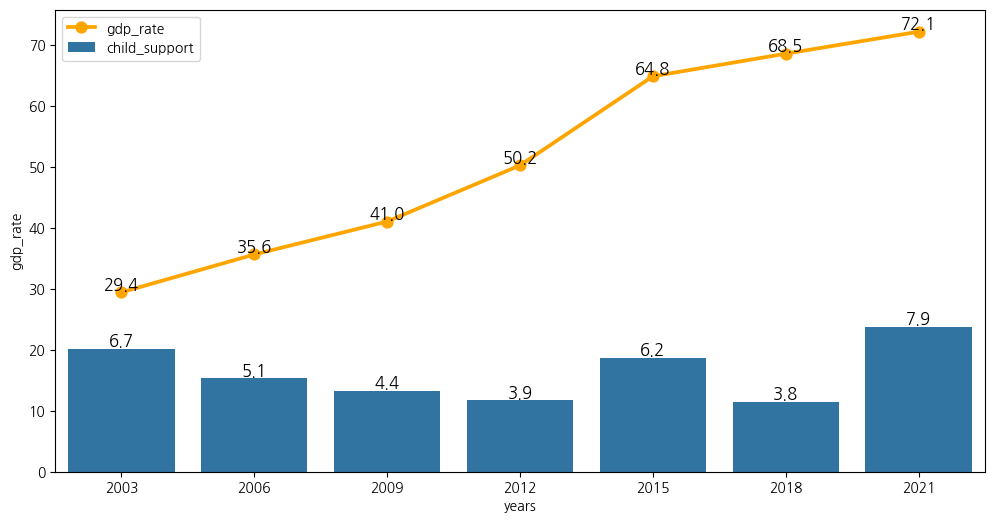

In [8]:
plt.figure(figsize=(12,6))
xdata =ecDF.index
ydata = ecDF['gdp_rate']*3
ydata2 = ecDF['child_support_per1']
ax = sns.barplot(x=xdata, y=ydata, label='child_support')
sns.pointplot(x=xdata, y=ydata2,color='orange', label='gdp_rate')


for x, y in enumerate(ecDF['gdp_rate']):
    plt.text(x, y*3, f'{y}', ha='center', va='bottom', fontsize=12, color='black')


for x, y in enumerate(ecDF['child_support_per1']):
    plt.text(x, y, f'{y}', ha='center', va='bottom', fontsize=12, color='black')

plt.legend()    
plt.show()

In [9]:
# cur = conn.cursor(pymysql.cursors.DictCursor)
# cur.execute('''
#            select *
#             from economy_idc_rate_r as e
#                 inner join child_support as c
#                 on e.years = c.years
#                 inner join cpi as cp
#                 on c.years = cp.years
#             ''')
# rows = cur.fetchall() # 모든 데이터를 가져옴-> DataFrame 형태
# ebwDF = pd.DataFrame(rows)


In [10]:
cur = conn.cursor(pymysql.cursors.DictCursor)
cur.execute('''
            select *
            from economy_idc_rate_r as e
                inner join both_working_r as bw
                on e.years = bw.years
                        
            ''')
rows = cur.fetchall() # 모든 데이터를 가져옴-> DataFrame 형태
ebwDF = pd.DataFrame(rows)

In [11]:
ebwDF.index=ebwDF['years']
ebwDF = ebwDF.drop(columns='years')

In [12]:
ebwDF

,gdp_rate,bw.years,total,both,both_rate,solo,solo_rate
years,,,,,,,
2015,6.2,2015,12143,5370,44.2,6773,55.8
2016,5.3,2016,12214,5535,45.3,6679,54.7
2017,5.5,2017,12289,5446,44.3,6843,55.7
2018,3.8,2018,12368,5684,46.0,6685,54.0
2019,1.7,2019,12472,5680,45.5,6792,54.5
2020,0.9,2020,12609,5675,45.0,6934,55.0
2021,7.9,2021,12687,5826,45.9,6861,54.1
2022,4.6,2022,12691,5846,46.1,6845,53.9
2023,3.3,2023,12687,6115,48.2,6572,51.8


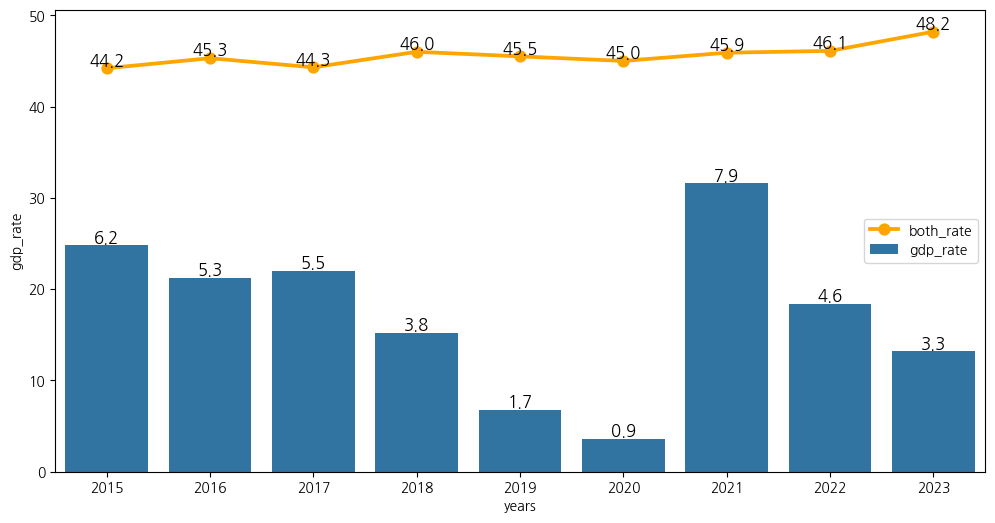

In [13]:
plt.figure(figsize=(12,6))
xdata =ebwDF.index
ydata = ebwDF['gdp_rate']*4
ydata2 = ebwDF['both_rate']
ax = sns.barplot(x=xdata, y=ydata, label='gdp_rate')
sns.pointplot(x=xdata, y=ydata2,color='orange',label='both_rate')


for x, y in enumerate(ebwDF['gdp_rate']):
    plt.text(x, y*4, f'{y:.1f}', ha='center', va='bottom', fontsize=12, color='black')


for x, y in enumerate(ydata2):
    plt.text(x, y, f'{y}', ha='center', va='bottom', fontsize=12, color='black')

plt.legend()
plt.show()

In [14]:
cur = conn.cursor(pymysql.cursors.DictCursor)
cur.execute('''
            select *
            from economy_idc_rate_r as e
                inner join house_holding_r as h
                on e.years = h.years
                        
            ''')
rows = cur.fetchall() # 모든 데이터를 가져옴-> DataFrame 형태
ehDF = pd.DataFrame(rows)

In [15]:
ehDF.index = ehDF.years
ehDF

,years,gdp_rate,h.years,1y,2y,3y,4y,5y
years,,,,,,,,
2015,2015,6.2,2015,137438,152111,170783,180732,187422
2016,2016,5.3,2016,132058,150014,166364,184189,194704
2017,2017,5.5,2017,118845,144080,163170,178554,197108
2018,2018,3.8,2018,114497,131188,157833,175279,192409
2019,2019,1.7,2019,101655,124581,140748,167375,186692
2020,2020,0.9,2020,90376,111539,134956,149263,177087
2021,2021,7.9,2021,81205,99948,121705,143466,157439
2022,2022,4.6,2022,81524,86427,104579,126342,149057
2023,2023,3.3,2023,93752,87535,92847,112785,135590


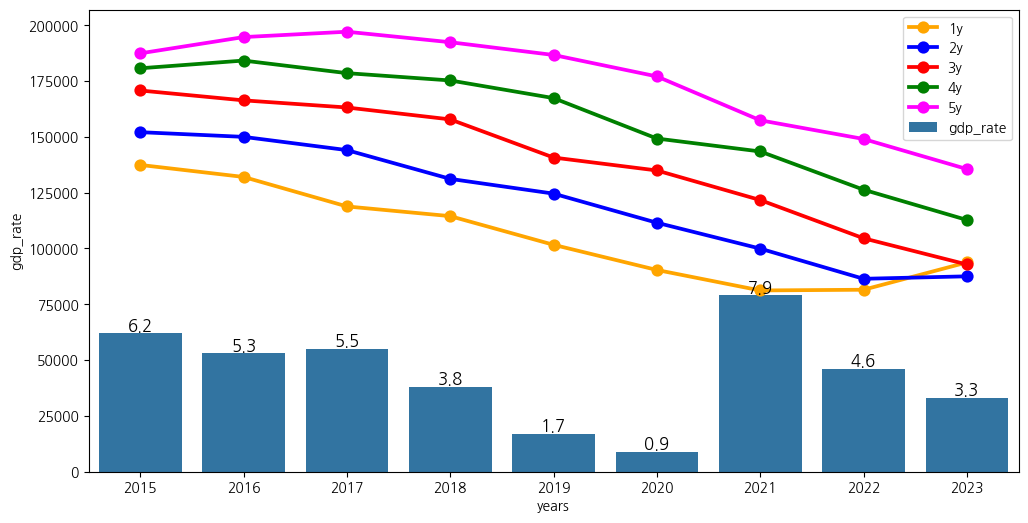

In [16]:
plt.figure(figsize=(12,6))
xdata =ehDF.index
ydata = ehDF['gdp_rate']*10000
sns.regplot(x=xdata, y=ydata, scatter=False, color='blue', ax=plt.gca() )
ax = sns.barplot(x=xdata, y=ydata, label='gdp_rate')




ydata2 = ehDF['1y']
sns.pointplot(x=xdata, y=ydata2,color='orange',label='1y')

ydata3 = ehDF['2y']
sns.pointplot(x=xdata, y=ydata3,color='blue',label='2y')

ydata4 = ehDF['3y']
sns.pointplot(x=xdata, y=ydata4,color='red',label='3y')

ydata5 = ehDF['4y']
sns.pointplot(x=xdata, y=ydata5,color='green',label='4y')

ydata6 = ehDF['5y']
sns.pointplot(x=xdata, y=ydata6,color='magenta',label='5y')



for x, y in enumerate(ehDF['gdp_rate']):
    plt.text(x, y*10000, f'{y:.1f}', ha='center', va='bottom', fontsize=12, color='black')


# for x, y in enumerate(ydata2):
#     plt.text(x, y, f'{y}', ha='center', va='bottom', fontsize=12, color='black')

plt.legend()
plt.show()

In [21]:
cur = conn.cursor(pymysql.cursors.DictCursor)
cur.execute('''
            select *
            from economy_idc_rate_r as e
                inner join birth_r as b
                on e.years = b.years
                        
            ''')
rows = cur.fetchall() # 모든 데이터를 가져옴-> DataFrame 형태
ebDF = pd.DataFrame(rows)

In [22]:
ebDF.index = ebDF.years

In [23]:
ebDF.index

Index([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
      dtype='int64', name='years')

In [51]:
ebDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 2000 to 2023
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   years             24 non-null     int64  
 1   gdp_rate          24 non-null     float64
 2   b.years           24 non-null     int64  
 3   total_birth_rate  24 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 960.0 bytes


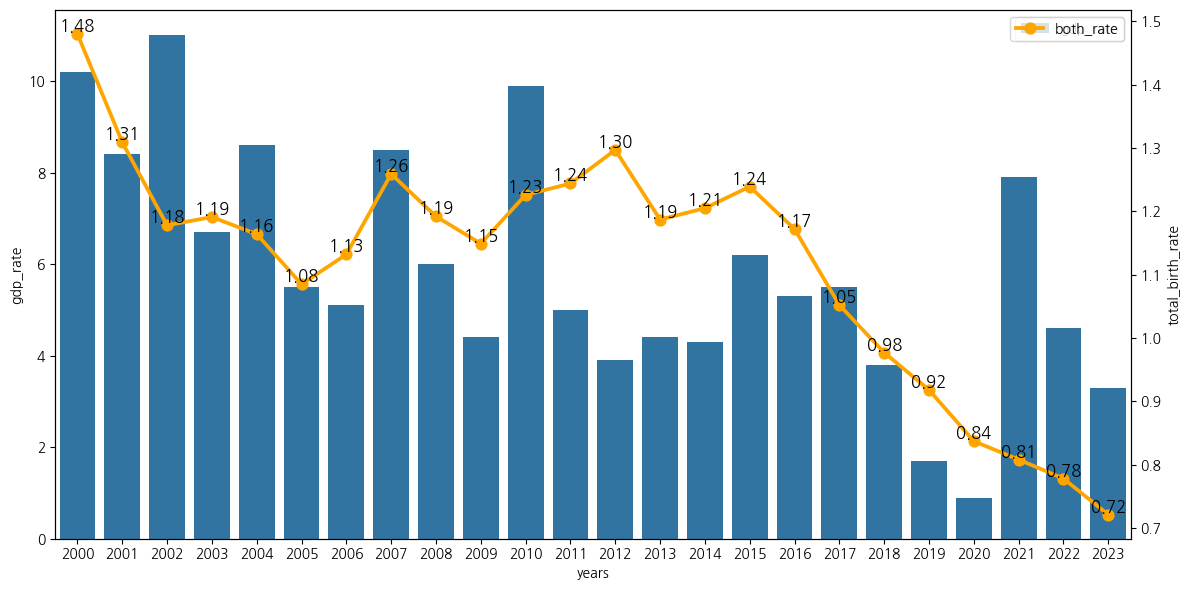

In [62]:

fig, ax1 = plt.subplots(figsize=(12,6))
xdata =ebDF.index
ydata = ebDF['gdp_rate']
ydata2 = ebDF['total_birth_rate']

# sns.regplot(x=xdata, y=ydata, ax = ax1, scatter=False)
ax = sns.barplot(x=xdata, y=ydata, ax = ax1, label='gdp_rate')


ax2= ax1.twinx()
sns.pointplot(x=xdata, y=ydata2, ax = ax2, color='orange',label='both_rate')


# for x, y in enumerate(ebDF['gdp_rate']):
#     plt.text(x, y, f'{y:.1f}', ha='center', va='bottom', fontsize=12, color='black')


for x, y in enumerate(ydata2):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom', fontsize=12, color='black')

plt.tight_layout()
# plt.legend()
plt.show()